In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(10,10))
    ax=fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [21]:
reeses = cv2.imread('DATA/reeses_puffs.png',0)

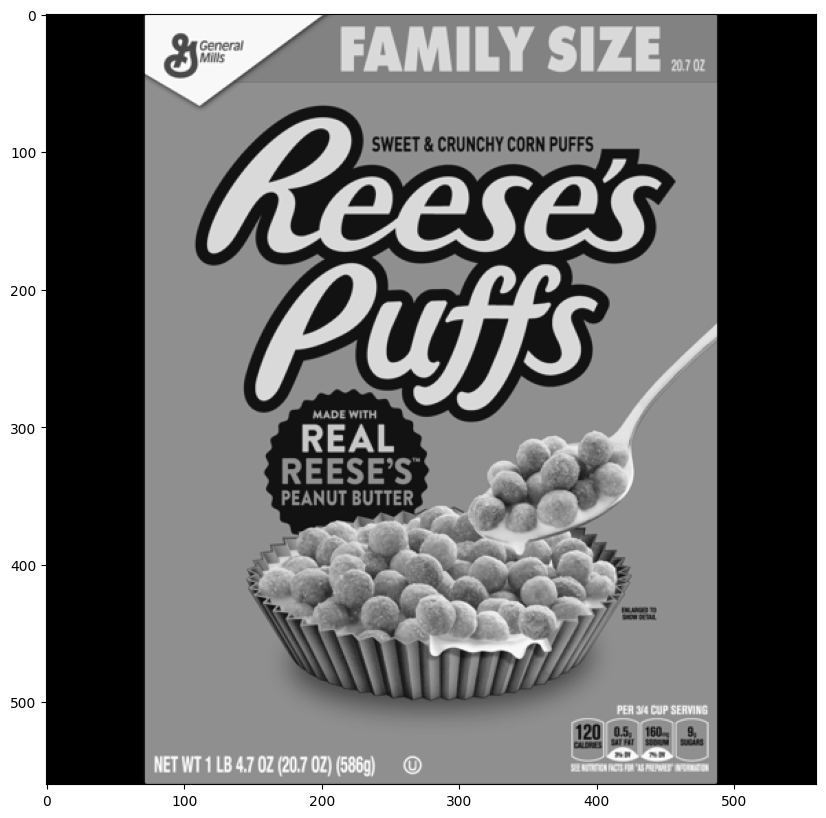

In [22]:
display(reeses)

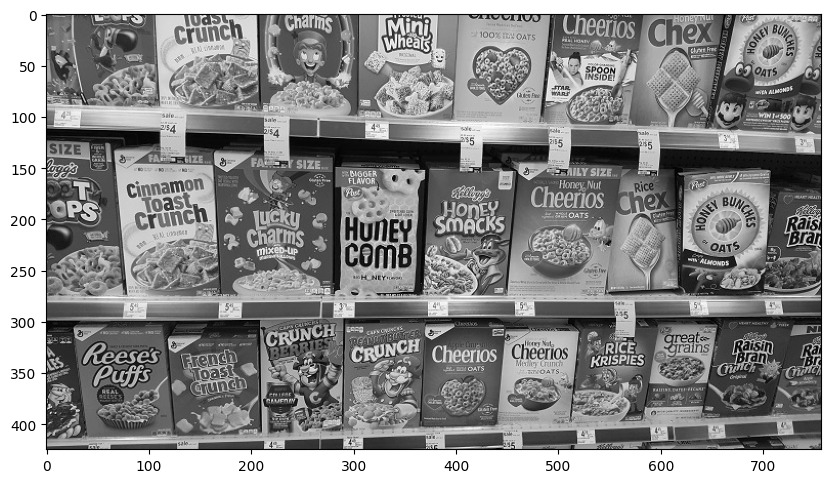

In [23]:
cereals=cv2.imread('DATA/many_cereals.jpg',0)
display(cereals)

In [ ]:
## ORB Brute force matching detection 
orb = cv2.ORB.create()

In [25]:
kp1,des1=orb.detectAndCompute(reeses,None) #maske yok, keypoint ve descripters dönüyor.
kp2,des2=orb.detectAndCompute(cereals,None) 

In [26]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)

In [27]:
matches= bf.match(des1,des2)

In [28]:
matches = sorted(matches,key=lambda x:x.distance) #distance fazla ise kötü eşleşme oluyor. bu şekilde kontrol ediliyor.


In [30]:
reese_matches =cv2.drawMatches(reeses,kp1,cereals,kp2,matches[:25],None,flags=2)

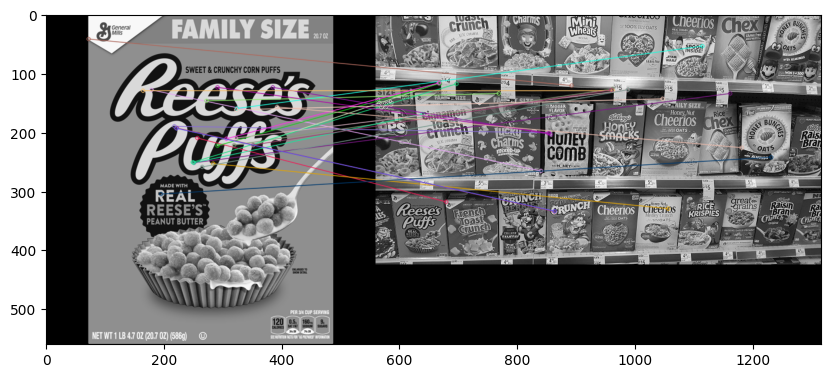

In [ ]:
display(reese_matches) # ORB Brute force bunun için çok başarılı değil.

In [33]:
## SIFT DETECTORS (imagelar farklı boyutta ise daha iyi olabilir.)
sift =cv2.xfeatures2d.SIFT_create()

In [34]:
kp1,des1=sift.detectAndCompute(reeses,None)
kp2,des2=sift.detectAndCompute(cereals,None)

In [35]:
bf= cv2.BFMatcher()

In [36]:
matches = bf.knnMatch(des1,des2,k=2) # k kadar en yüksek seviyede match buluyor.

In [38]:
matches #oran testi yapacağız çiftler distance olarak yakın mı diye

((< cv2.DMatch 0000026059C7C450>, < cv2.DMatch 0000026059C7D230>),
 (< cv2.DMatch 0000026059C7D370>, < cv2.DMatch 0000026059C7C570>),
 (< cv2.DMatch 0000026059C7D3F0>, < cv2.DMatch 0000026059C7D910>),
 (< cv2.DMatch 0000026059C7C370>, < cv2.DMatch 0000026059C7D4B0>),
 (< cv2.DMatch 0000026059C7D1F0>, < cv2.DMatch 0000026059C7D7B0>),
 (< cv2.DMatch 0000026059C7D710>, < cv2.DMatch 0000026059C7C810>),
 (< cv2.DMatch 0000026059C7D830>, < cv2.DMatch 0000026059C7D6D0>),
 (< cv2.DMatch 0000026059C7C990>, < cv2.DMatch 0000026059C7D390>),
 (< cv2.DMatch 0000026059C7C3D0>, < cv2.DMatch 0000026059C7C2F0>),
 (< cv2.DMatch 0000026059C7D9B0>, < cv2.DMatch 0000026059C7D6B0>),
 (< cv2.DMatch 0000026059C7D7F0>, < cv2.DMatch 0000026059C7D9F0>),
 (< cv2.DMatch 0000026059C7D350>, < cv2.DMatch 0000026059C7D4F0>),
 (< cv2.DMatch 0000026059C7CE10>, < cv2.DMatch 0000026059C7D8F0>),
 (< cv2.DMatch 0000026059C7D4D0>, < cv2.DMatch 0000026059C7D990>),
 (< cv2.DMatch 0000026059C7D8D0>, < cv2.DMatch 0000026059C7D9D

In [39]:
#oran testi
#az uzaklık = daha iyi eşleşme

good = []
for match1,match2 in matches:
    #eğer match1 uzaklığı match2'nin %75inden azsa onu iyilere alıyoruz.
    if match1.distance < 0.75* match2.distance:
        good.append([match1])

In [ ]:
len(good) #79
len(matches) #1501 tane

1501

In [43]:
sift_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=2)

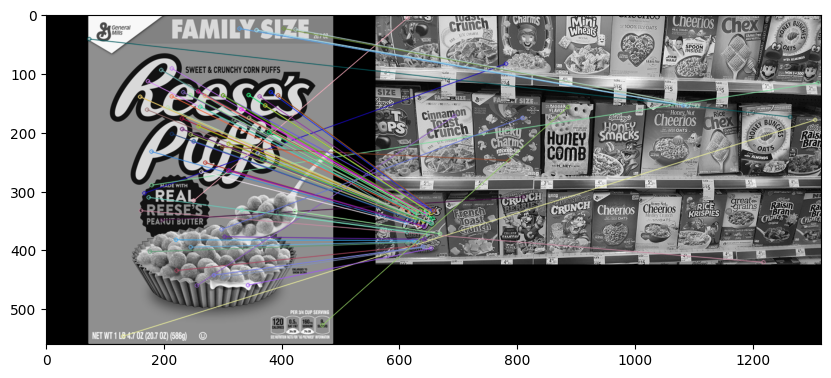

In [ ]:
display(sift_matches) #çok daha başarılı buldu.

In [52]:
sift= cv2.xfeatures2d.SIFT_create()
kp1,des1=sift.detectAndCompute(reeses,None) 
kp2,des2=sift.detectAndCompute(cereals,None) 

In [53]:
#FLANN Parametreli hali olacak. genel matchleri bulacak ama DAHA hızlı olacak. !!!
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm=FLANN_INDEX_KDTREE,trees=5)
search_params = dict(checks=50)


In [54]:
flann = cv2.FlannBasedMatcher(indexParams=index_params,searchParams=search_params) # çok büyük image'ler için daha hızlı oluyor.


In [55]:
matches= flann.knnMatch(des1,des2,k=2)

In [69]:
matchesMask = [[0,0]for i in range (len(matches))]

In [70]:

for i,(match1,match2) in enumerate(matches):
    #eğer match1 uzaklığı match2'nin %75inden azsa onu iyilere alıyoruz.
    if match1.distance < 0.75 * match2.distance:
        matchesMask[i]=[1,0]

In [71]:
draw_params = dict(matchColor = (0,255,0),
                   singlePointColor=(255,0,0),
                   mathcesMask= matchesMask,
                   flags=0)

In [73]:
flann_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,matches,None,**draw_params)
display(flann_matches)

error: OpenCV(4.10.0) :-1: error: (-5:Bad argument) in function 'drawMatchesKnn'
> Overload resolution failed:
>  - 'mathcesMask' is an invalid keyword argument for drawMatchesKnn()
>  - 'mathcesMask' is an invalid keyword argument for drawMatchesKnn()
